# Here is a 3-Qubit case of the Deutsch-Josza algorithm

# Importing all modules

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

Here we will show two examples of creating oracles for the 3-Qubit Deutsch-Josza problem

In [2]:
circ1 = QuantumCircuit(3, 2)
circ2 = QuantumCircuit(3, 2)

$f(x, y) = 0$

$f_\text{out} = z\oplus f(x,y)$

| $x$ | $y$ | $z$ | $f_\text{out}$ |
|---|---|---|---|
| 0 | 0 | 0 | 0 |
| 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 |
| 1 | 1 | 0 | 0 |
| 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 1 |
| 0 | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 |


/home/niall/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


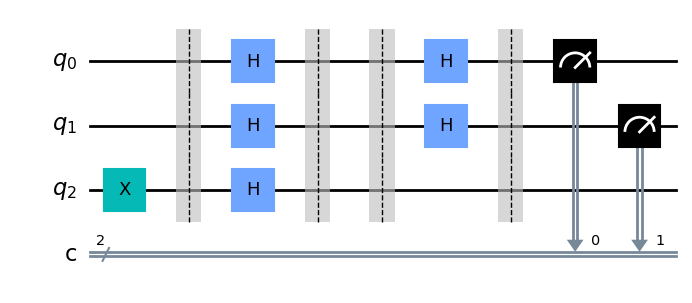

In [3]:
circ1.x(2)
circ1.barrier()
circ1.h(0)
circ1.h(1)
circ1.h(2)
circ1.barrier()
circ1.barrier()
circ1.h(0)
circ1.h(1)
circ1.barrier()
circ1.measure([0,1],[0,1])
circ1.draw("mpl")

$f(x,y) = x\oplus y$

$f_\text{out} = z\oplus f(x,y)$

| $x$ | $y$ | $z$ | $f_\text{out}$ |
|---|---|---|---|
| 0 | 0 | 0 | 0 |
| 1 | 0 | 0 | 1 |
| 0 | 1 | 0 | 1 |
| 1 | 1 | 0 | 0 |
| 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 |
| 1 | 1 | 1 | 1 |


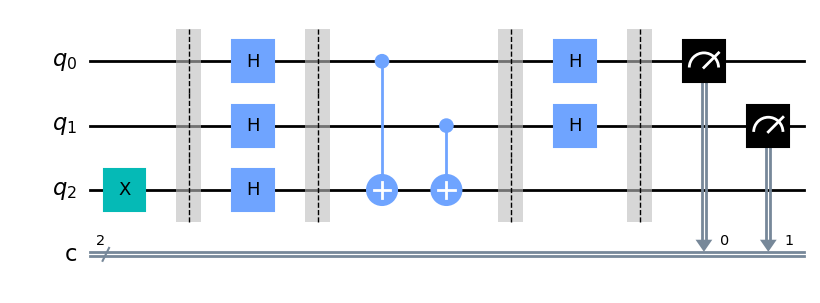

In [4]:
circ2.x(2)
circ2.barrier()
circ2.h(0)
circ2.h(1)
circ2.h(2)
circ2.barrier()
circ2.cx(0,2)
circ2.cx(1,2)
circ2.barrier()
circ2.h(0)
circ2.h(1)
circ2.barrier()
circ2.measure([0,1],[0,1])
circ2.draw("mpl")

# Include AER simulator

### Notice that the output is 100% correct everytime with the ideal simulator. Can you run the same circuits on a noisy backend?


In [5]:
Aer.backends()

backend = Aer.get_backend("qasm_simulator")
transp_circ1 = transpile(circ1, backend)
transp_circ2 = transpile(circ2, backend)

In [6]:
job1 = backend.run(transp_circ1, shots = 1000)
result1 = job1.result()
counts1 = result1.get_counts(transp_circ1)
job2 = backend.run(transp_circ2, shots = 1000)
result2 = job2.result()
counts2 = result2.get_counts(transp_circ2)

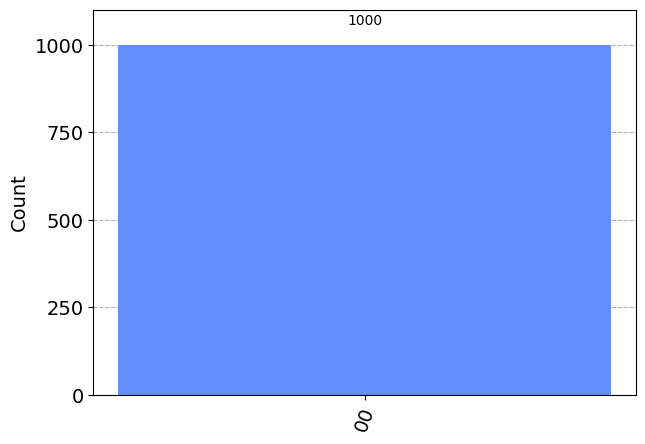

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts1)

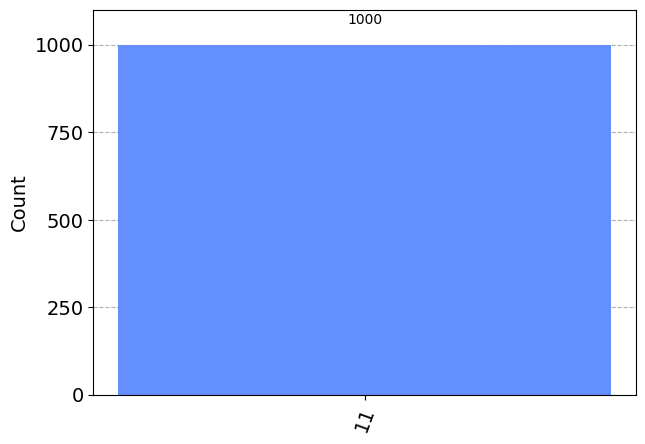

In [8]:
plot_histogram(counts2)